**Yapay Sinir Ağları İçin Problem İfadesini Anlamak**

Burada finans alanından bir veri seti ile uğraşıyoruz. Toplamda 14 boyutumuz ve 100.000 kaydımız olan bir veri setimiz var. Ele alacağımız boyutlar aşağıdaki gibidir: 

1. RowNumber: Satır sayısını temsil eder
2. CustomerId: Müşteri Kimliğini temsil eder
3. Surname: Müşterinin soyadını temsil eder
4. CreditScore: Müşterinin kredi notunu temsil eder
5. Geography: Müşterilerin ait olduğu şehri temsil eder
6. Gender: Müşterinin Cinsiyetini temsil eder
7. Age: Müşterinin yaşını temsil eder
8. Tenure: Müşterinin bir bankadaki görev süresini temsil eder
9. Balance: Müşteri tarafından tutulan bakiyeyi temsil eder
10. NumOfProducts: Müşteri tarafından kullanılan banka hizmetlerinin sayısını temsil eder
11. HasCrCard: Müşterinin kredi kartı olup olmadığını gösterir
12. IsActiveMember: Bir müşterinin aktif üye olup olmadığını temsil eder
13. EstimatedSalary: Müşterinin tahmini maaşını temsil eder
14. Exited: Bir müşterinin bankadan çıkıp çıkmayacağını gösterir.

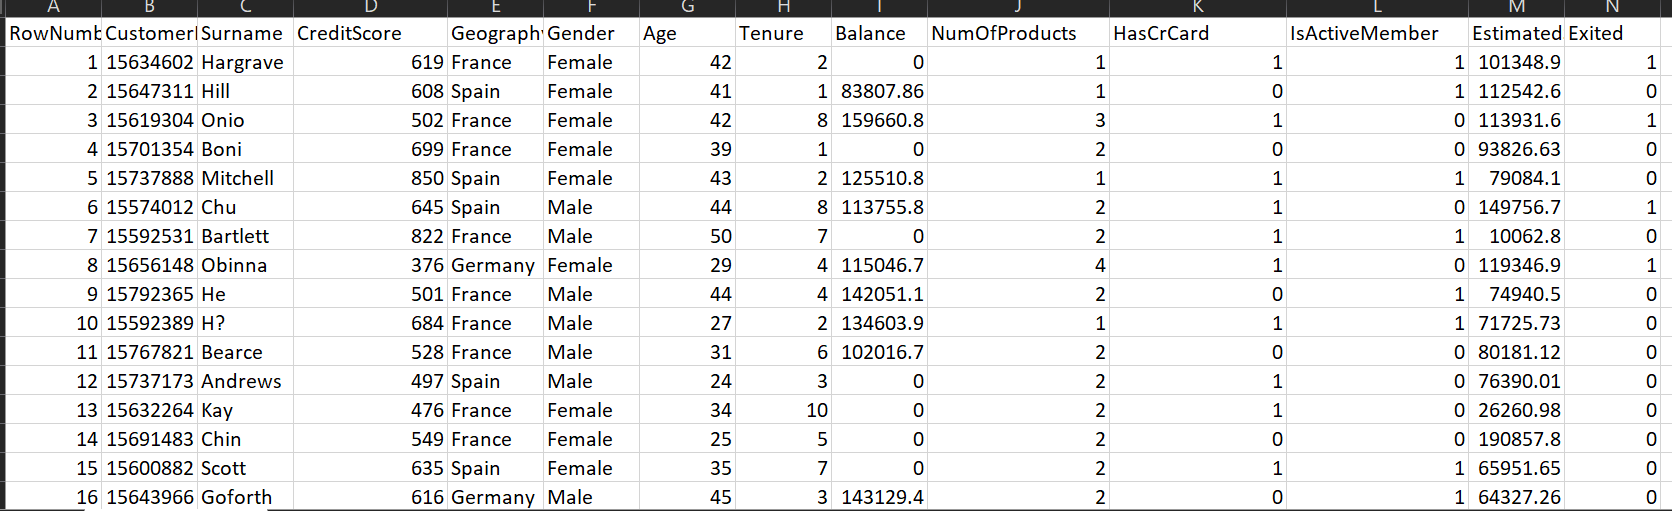

Burada asıl amacımız, tüm bağımsız değişkenleri (ilk 13) dikkate alacak ve buna göre müşterimizin bankadan çıkıp çıkmayacağını tahmin edecek bir yapay sinir ağı oluşturmaktır (Çıkış burada bağımlı değişkendir).

In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
#Loading Dataset
data = pd.read_csv("Churn_Modelling.csv")

**Özellik Matrisi Oluşturma (X)**

Bir makine öğrenme modeli oluştururken temel ilke, Özellikler Matrisi olarak da adlandırılan X'i oluşturmaktır. Bu X temel olarak tüm bağımsız değişkenlerimizi içerir. Aynısını burada da oluşturalım.

Burada gördüğümüz gibi 3. sütundan son eksi bir sütuna kadar tüm verileri alıyoruz. Bunun nedeni, ilk 3 sütunun, yani RowNumber, CustomerId ve Surname'nin müşterinin çıkıp çıkmayacağına karar vermekle hiçbir ilgisi olmamasıdır. Dolayısıyla bu durumda 3. sütundan itibaren tüm değerleri almaya başladık. Son olarak, son sütunumuz temelde bağımlı bir değişken olduğundan, iloc yönteminde -1'den bahsettik, bu da son sütunu X özellik matrisimize dahil etmekten hariç tutmamıza izin verir.

In [3]:
#Generating Matrix of Features
X = data.iloc[:,3:-1].values

**Bağımlı Değişken Vektör Oluşturma**

Bağımsız değişken için öznitelik matrisimizi(X) oluşturduğumuz gibi, sadece bağımlı değişken değerlerimizi içerecek bir bağımlı değişken vektörü(Y) de oluşturmalıyız.

In [4]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values

**Kategorik Değişken Cinsiyeti Kodlama**

Veri kümesinin yapısını gösteren yukarıdaki görüntüde, birkaç değişken dışında, değişkenlerin çoğunun sayısal olduğunu görebiliriz – Cinsiyet, Ülke. Temel olarak, bir makine öğrenimi modeli, yalnızca rakamları girdi olarak kabul edecek olan matematiksel bir formüldür. Bu yüzden, bir veri karışımı (sayısal + dize) içeren bu veri kümesini kullanarak bir ML modeli oluşturmaya çalışıyoruz, modelimiz oluşturma işlemi sırasında başarısız olacaktır. Bu nedenle, bu dize değerlerini, önemlerini kaybetmeden sayısal eşdeğerlerine dönüştürmemiz gerekiyor.

Bunu yapmanın en etkili yollarından biri, Encoding adı verilen bir teknik kullanmaktır. Dizeleri veya kategorileri, önemlerini kaybetmeden doğrudan sayısal eşdeğerlerine dönüştürecek bir işlemdir.

Burada cinsiyet sütunumuz erkek ve kadın olmak üzere sadece 2 kategoriye sahiptir, LabelEncoding kullanacağız. Bu tür kodlama, bu sütunu 0 ve 1 değerlerine sahip bir sütuna dönüştürecektir. Label Encoding'i kullanmak için sklearn kütüphanesinden LabelEncoder sınıfını kullanacağız.

In [5]:
#Encoding Categorical Variable Gender
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

**Kategorik Değişken Ülkeyi Kodlama**

Şimdi country adlı başka bir kategorik sütunla ilgilenelim. Bu sütun 3'lük bir kardinaliteye sahiptir, yani Fransa, Almanya, İspanya gibi 3 ayrı kategoriye sahiptir.

Burada 2 seçeneğimiz var: 
1. Burada Label Encoding kullanabiliriz ve bu değerleri direkt olarak 0,1,2'ye çevirebiliriz.
2. Burada, bu dizileri ikili vektör akışına dönüştürecek One Hot Encoding kullanabiliriz. Örneğin – İspanya 001 olarak kodlanacak, Fransa 010 olarak kodlanacak vb.

İlk yaklaşımın uygulanması kolay ve hızlıdır. Ancak, bu değerler kodlandıktan sonra 0,1,2'ye dönüştürülecektir. Ancak, One Hot Encoding olarak bilinen başka bir kodlama yöntemi vardır. One Hot Encoding, tüm dize değerleri 0'lar ve 1'lerden oluşan ikili akışlara dönüştürülür. One Hot Encoding, makine öğrenimi algoritmasının daha yüksek sayıların daha önemli olduğunu varsaymamasını sağlar.

In [6]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

**Veri kümesini eğitim ve test veri kümesine bölme**

Bu adımda, veri setimizi eğitim ve test veri setlerine ayıracağız. Bu, tüm makine öğrenimi sürecinin temel taşlarından biridir. Eğitim veri seti, modelimizin üzerinde eğitim alacağı, test veri seti ise modelimizin performansını test edeceğimiz veri setidir. Veri setimizi, eğitim aşamasında verinin yüzde 80'i oranda olacak ve verinin yüzde 20'si test aşamasında olacak şekilde bir konfigürasyonda böldük.

In [7]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

**Özellik Ölçeklendirmeyi Gerçekleştirme**

Tüm değişkenlerin aynı ölçeğe dönüştürülmesi işlemidir. Neden? Bazen veri setimizde bazı değişkenler çok yüksek değerlere sahipken bazı değişkenler çok düşük değerlere sahiptir. Dolayısıyla, model oluşturma sırasında, aşırı yüksek değerli değişkenlerin, aşırı düşük değerli değişkenlere hakim olma şansı vardır. Bu nedenle, düşük değerli değişkenlerin modelimiz tarafından ihmal edilme olasılığı vardır ve bu nedenle özellik ölçekleme gereklidir.

**Ne zaman yapılmalı?** Cevap, veri setini eğitim ve test veri setlerine böldükten sonra. Bunun nedeni, eğitim veri kümesinin, modelimizin üzerinde eğitim alacağı veya kendisinin öğreneceği bir şeydir. Test veri seti, modelimizin değerlendirileceği bir şey olsa da. Eğer train-test bölünmesinden önce özellik ölçeklendirmesi yaparsak, bu test veri setlerine sahip olma amacını ihmal eden test veri setlerinde bilgi sızıntısına neden olur ve bu nedenle, train-test bölünmesinden sonra her zaman özellik ölçeklendirmesi yapmalıyız.

**Özellik ölçeklemeyi nasıl yapacağız?** Birçok yolu vardır. Bağlamdaki en verimli iki teknik şunlardır:
1. Standardizasyon (Standardization)
2. Normalleştirme (Normalization)

Standardizasyon yapıldığında, veri setindeki tüm değerler -3 ile +3 arasında değişen değerlere dönüştürülecektir. Normalleştirme durumunda, tüm değerler -1 ile +1 arasında bir aralığa dönüştürülecektir.

Hangi tekniğin ne zaman kullanılacağına dair birkaç koşul vardır. Genellikle, Normalleştirme yalnızca veri kümemiz normal bir dağılım izlediğinde kullanılırken, standardizasyon, dağılımdan bağımsız olarak herhangi bir veri kümesi için kullanılabilen evrensel bir tekniktir. Burada Standardizasyonu kullanacağız.

In [8]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Yapay Sinir Ağının Başlatılması**

YSA oluştururken ilk adımdır. Burada, Sequential adlı belirli bir Keras sınıfını kullanarak ann nesnemizi oluşturacağız.

In [9]:
#Initialising ANN
ann = tf.keras.models.Sequential()

**Gizli Katmanlar Oluşturma**

Ann'imizi başlattığımızda, şimdi aynısı için katmanlar oluşturacağız. Burada 2 gizli katman, 1 giriş katmanı ve 1 çıkış katmanı olacak bir ağ oluşturacağız. O halde ilk gizli katmanımızı oluşturalım

Burada katmanlar modülünün bir parçası olan Dense sınıfını kullanarak ilk gizli katmanımızı oluşturduk. Bu sınıf 2 girişi kabul eder: 
1. units: ilgili katmanda bulunacak nöron sayısı 
2. activation: hangi aktivasyon fonksiyonunun kullanılacağını belirtin

İlk giriş için geçmişte birçok değerle test edilmiş ve bulunan en uygun değer 6'dır. Açıkçası, katmanda bulunması gereken nöron sayısı hakkında kesin bir kural olmadığı için başka herhangi bir değerle deneyebiliriz. 

In [10]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

İkinci girdi için, gizli katmanlar için aktivasyon fonksiyonu olarak her zaman "relu" [rectified linear unit] kullanacağız. İki gizli katman oluşturacağımız için aynı adımı ikinci gizli katmanı oluşturmak için de tekrarlayacağız.

In [11]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

**Çıktı Katmanı Oluşturma**

Bu adımda ann için çıktı katmanımızı oluşturacağız. Burada yine çıktı katmanını oluşturmak için Dense sınıfını kullanacağız. Burada hatırlanması gereken iki önemli şey: 
1. Çıktı olarak sadece iki sınıfa (1 ve 0) sahip olacağımız bir ikili sınıflandırma probleminde, bu sonucu çıktılamak için sadece bir nöron tahsis edeceğiz. Çok sınıflı sınıflandırma problemi için çıktı katmanında birden fazla nöron kullanmak zorundayız. Örneğin, çıktımız 4 kategori içeriyorsa 4 farklı nöron [her kategori için bir tane] oluşturmamız gerekir. 
2. İkili sınıflandırma Problemleri için her zaman kullanılması gereken aktivasyon fonksiyonu **sigmoid**dir. Çok sınıflı bir sınıflandırma problemi için kullanılması gereken aktivasyon fonksiyonu **softmax**'tır.

Burada ikili sınıflandırma ile uğraştığımız için çıktı katmanında sadece bir nöron tahsis ediyoruz ve kullanılan aktivasyon fonksiyonu softmax'tır.

In [12]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

**Yapay Sinir Ağının Derlenmesi**

Artık sinir ağımız için katmanlar oluşturduk. Bu adımda YSA'mızı derleyeceğiz. Ağımızı derlemek için ann nesnemizin derleme yöntemini kullandık. Derleme yöntemi aşağıdaki girdileri kabul eder: 
1. optimizer: stokastik gradyan inişi gerçekleştirmek için hangi optimize edicinin kullanılacağını belirtir. RMSProp, adam gibi çeşitli optimize edicilerle deneyler yaptım ve adam optimizer'ın herhangi bir sinir ağıyla kullanılabilecek güvenilir bir tanesi olduğunu buldum. 
2. loss: hangi kayıp fonksiyonunun kullanılması gerektiğini belirtir. İkili sınıflandırma için değer binary_crossentropy olmalıdır. Çok sınıflı sınıflandırma için categorical_crossentropy olmalıdır. 
3. metrics: performansı hesaplamak için hangi performans metriklerinin kullanılacağı. Burada bir performans ölçüsü olarak doğruluğu (accuracy) kullandık.

In [13]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

**Yapay Sinir Ağı Uydurma (Fitting)**

Bu, ann oluşturma sürecimizdeki son adımdır. Burada sadece ann'imizi eğitim veri seti üzerinde eğiteceğiz. Burada ann'ımızı eğitmek için fit yöntemini kullandık. Fit yöntemi bu durumda 4 girişi kabul ediyor: 
1. X_train : Eğitim veri kümesi için özellik matrisi
2. Y_train : Eğitim veri seti için bağımlı değişken vektörleri
3. batch_size : partide kaç gözlem olması gerektiği. Genellikle bu parametrenin değeri 32'dir ancak başka herhangi bir değerle de deney yapabiliriz.
4. epochs : Sinir ağlarının kaç kez eğitileceği. Burada deneyimlerimden bulduğum optimal değer 100'dür. 

In [14]:
#Fitting ANN
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5298 - accuracy: 0.7893
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.7961
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4432 - accuracy: 0.7971
Epoch 4/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4344 - accuracy: 0.8023
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4285 - accuracy: 0.8096
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.8149
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.8223
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8295
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4057 - accuracy: 0.8316
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3990 - accura

**Yapay Sinir Ağı Eğitimi**

Burada her epoch'da kaybımızın azaldığını ve doğruluğumuzun arttığını görebiliriz. Burada gördüğümüz gibi, son doğruluğumuz 86.59'dur ve bu basitliğe sahip bir sinir ağı için oldukça dikkat çekicidir.  

**Tek Nokta Gözlem için sonucu tahmin etme**

Ek olarak, herhangi bir özel girdi değeri için tek noktalı tahmin yapmamızı sağlayacak kodu aşağıya ekliyorum. Burada sinir ağımız, bağımsız değişkenlerin değerlerine dayanarak müşterimizin çıkıp çıkmayacağını tahmin etmeye çalışıyor.

In [15]:
#Predicting result for Single Observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1,50000]])) > 0.5)

1/1 [==============================] - 0s 100ms/step
[[False]]


In [16]:
#https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/